In [3]:
"""
JUPYTER NOTEBOOK 2: SOLUTIONS

"""

# =========================
# 1. SETUP
# =========================

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm  # norm provides methods for normal distribution

# For inline plotting in Jupyter
%matplotlib inline

# We set a random seed for reproducibility
np.random.seed(42)

# Define our "population" parameters
true_mean = 50.0
true_std = 2.0

print("Setup complete. Libraries imported, random seed set, true parameters defined.")



Setup complete. Libraries imported, random seed set, true parameters defined.


One simulated rod length: 50.993428306022466
Z-score of this observation: 0.4967141530112329


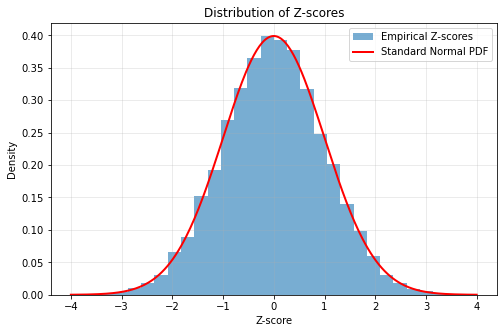

In [4]:
# =========================
# 2. Z-SCORES
# =========================

# ---- Task 1: Single rod length & z-score
single_rod_length = norm.rvs(loc=true_mean, scale=true_std, size=1)[0]
print("One simulated rod length:", single_rod_length)

z_score_single = (single_rod_length - true_mean) / true_std
print("Z-score of this observation:", z_score_single)

# ---- Task 2: Many rod lengths, compute z-scores, plot histogram
N = 10000
rod_lengths = norm.rvs(loc=true_mean, scale=true_std, size=N)
z_scores = (rod_lengths - true_mean) / true_std

plt.figure(figsize=(8, 5))
plt.hist(z_scores, bins=30, density=True, alpha=0.6, label='Empirical Z-scores')

# We'll compare to the standard normal PDF
x_values = np.linspace(-4, 4, 300)
pdf_standard_normal = norm.pdf(x_values, 0, 1)
plt.plot(x_values, pdf_standard_normal, 'r-', lw=2, label='Standard Normal PDF')

plt.title("Distribution of Z-scores")
plt.xlabel("Z-score")
plt.grid(alpha = 0.3)
plt.ylabel("Density")
plt.legend()
plt.show()



Sample size:    10, Mean of sample: 48.44
Sample size:    50, Mean of sample: 50.26
Sample size:   100, Mean of sample: 50.42
Sample size:   500, Mean of sample: 50.05
Sample size:  1000, Mean of sample: 49.93
Sample size:  5000, Mean of sample: 50.03
Sample size: 10000, Mean of sample: 49.97


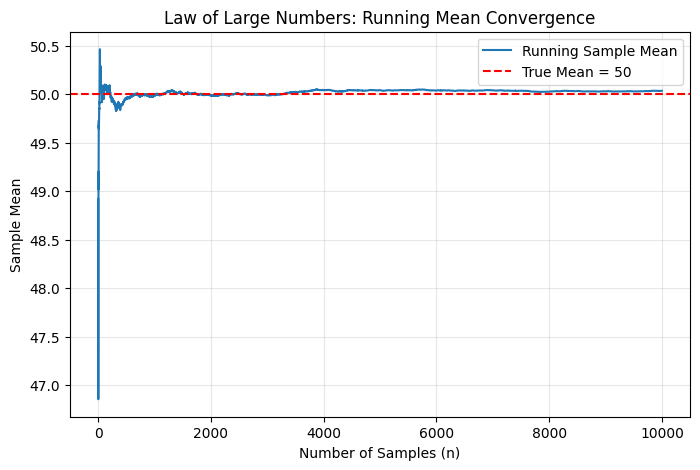

In [9]:
# =========================
# 3. LAW OF LARGE NUMBERS
# =========================

# ---- Task 1: Sample means for increasing sample size
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
means_list = []

for n in sample_sizes:
    sample = norm.rvs(loc=true_mean, scale=true_std, size=n)
    sample_mean = np.mean(sample)
    means_list.append(sample_mean)

# Print results
for s, m in zip(sample_sizes, means_list):
    print(f"Sample size: {s:5d}, Mean of sample: {m:.2f}")

# ---- Task 2: Single large sample, running mean
max_n = 10000
large_sample = norm.rvs(loc=true_mean, scale=true_std, size=max_n)
cumulative_sums = np.cumsum(large_sample)
cumulative_means = cumulative_sums / np.arange(1, max_n + 1)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_means, label='Running Sample Mean')
plt.axhline(y=true_mean, color='r', linestyle='--', label='True Mean = 50')
plt.grid(alpha=0.3)
plt.title("Law of Large Numbers: Running Mean Convergence")
plt.xlabel("Number of Samples (n)")
plt.ylabel("Sample Mean")
plt.legend()
plt.show()


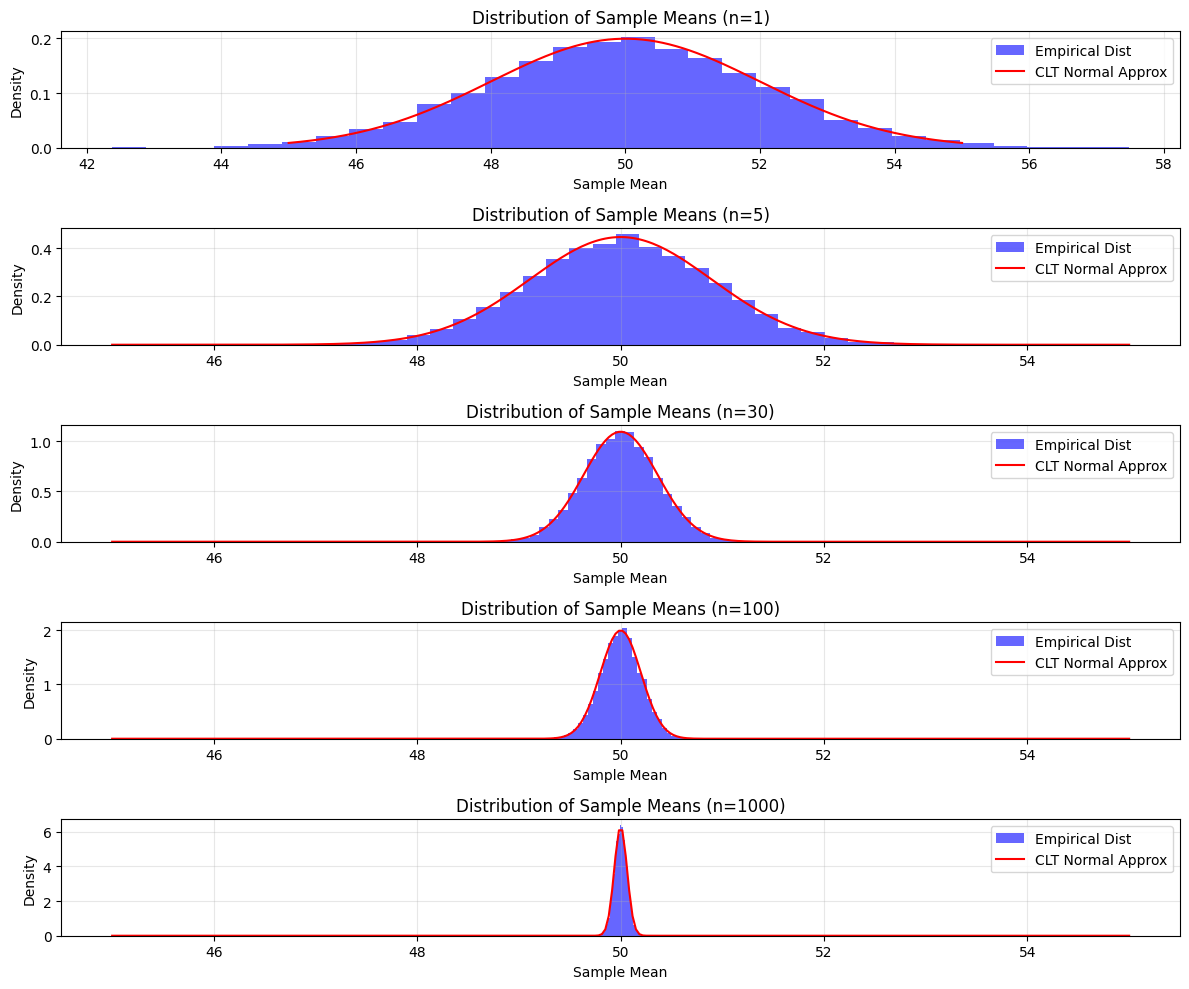

In [11]:
# =========================
# 4. CENTRAL LIMIT THEOREM
# =========================

# We'll choose several sample sizes and see how the distribution of 
# sample means behaves (CLT).
num_experiments = 10000
sample_sizes_clt = [1, 5, 30, 100, 1000]

plt.figure(figsize=(12, 10))

for i, n in enumerate(sample_sizes_clt, start=1):
    means_n = []
    
    for _ in range(num_experiments):
        sample = norm.rvs(loc=true_mean, scale=true_std, size=n)
        means_n.append(np.mean(sample))
    
    means_n = np.array(means_n)
    
    plt.subplot(len(sample_sizes_clt), 1, i)
    plt.hist(means_n, bins=30, density=True, alpha=0.6, color='blue', label='Empirical Dist')
    
    # Theoretical normal distribution for the sample means: N(true_mean, true_std^2 / n)
    x_vals = np.linspace(45, 55, 300)
    theoretical_pdf = norm.pdf(x_vals, loc=true_mean, scale=true_std / np.sqrt(n))
    plt.plot(x_vals, theoretical_pdf, 'r-', label='CLT Normal Approx')
    plt.grid(alpha = 0.3)
    plt.title(f"Distribution of Sample Means (n={n})")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()


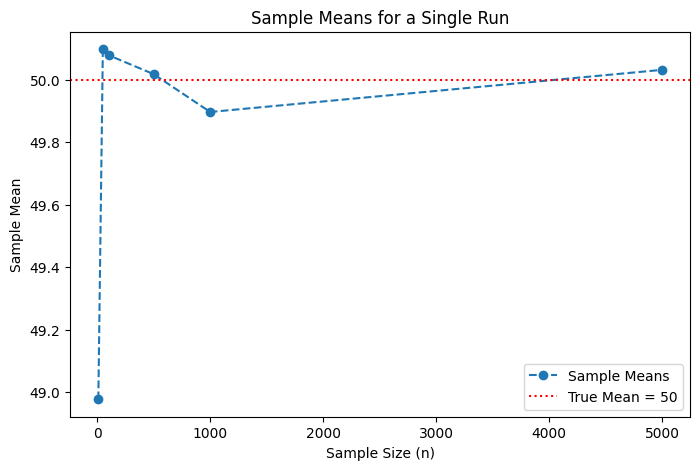

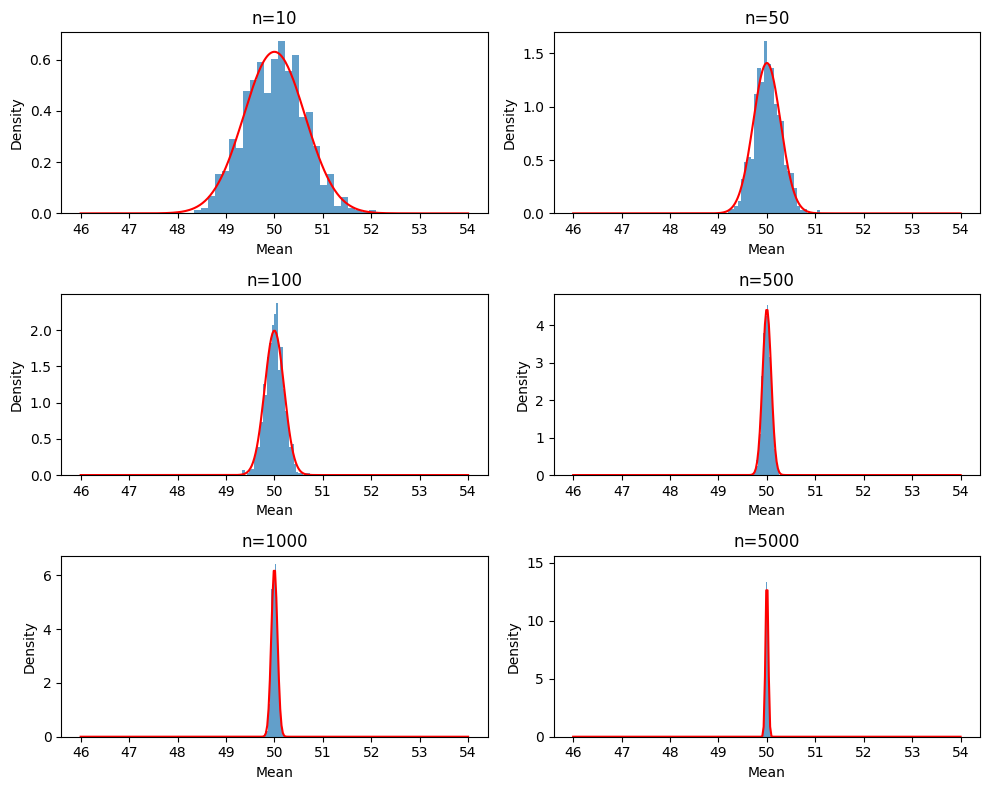

All tasks complete. Review the plots to see LLN and CLT in action!


In [12]:
# =========================
# 5. PUTTING IT ALL TOGETHER
# =========================

# (A) Single run of sample means for multiple sample sizes
sample_sizes_final = [10, 50, 100, 500, 1000, 5000]
means_single_run = []

for n in sample_sizes_final:
    sample = norm.rvs(loc=true_mean, scale=true_std, size=n)
    means_single_run.append(np.mean(sample))

plt.figure(figsize=(8, 5))
plt.plot(sample_sizes_final, means_single_run, marker='o', linestyle='--', label='Sample Means')
plt.axhline(true_mean, color='red', linestyle=':', label='True Mean = 50')
plt.title("Sample Means for a Single Run")
plt.xlabel("Sample Size (n)")
plt.ylabel("Sample Mean")
plt.legend()
plt.show()

# (B) Multiple runs for each sample size, show distribution of sample means
num_experiments_final = 1000
plt.figure(figsize=(10, 8))

for i, n in enumerate(sample_sizes_final, start=1):
    all_means = []
    for _ in range(num_experiments_final):
        sample = norm.rvs(loc=true_mean, scale=true_std, size=n)
        all_means.append(np.mean(sample))
    
    plt.subplot(3, 2, i)
    plt.hist(all_means, bins=30, density=True, alpha=0.7)
    
    x_vals = np.linspace(46, 54, 300)
    theo_pdf = norm.pdf(x_vals, loc=true_mean, scale=true_std / np.sqrt(n))
    plt.plot(x_vals, theo_pdf, 'r-')
    plt.title(f"n={n}")
    plt.xlabel("Mean")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

print("All tasks complete. Review the plots to see LLN and CLT in action!")

